Demography: the study of human populations in relation to the changes brought about by the interplay of births, deaths, and migration” (Pressat, 1985))

https://rpubs.com/Karuitha/pop_python

# 1) Background

In this analysis, I scrap and analyze population and country data from three sites:

World population from 1800 to present on Wikipedia available here https://en.wikipedia.org/wiki/World_population

World population by country Wikipedia available here https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population”

Country codes on Cloford available here https://cloford.com/resources/codes/index.htm’

# 2) Objectives

The objectives of the analysis are as follows:

To illustrate how to scrap data tables from websites using Python and Pandas.

To demonstrate the mechanics of analyzing and plotting data in Python, Pandas and Matplotlib.

To illustrate how to merge data in the Python module Pandas.

To visualise the trend in global population from 1800 to 2050.

To visualise world population by continent using the pythom module matplotlib.

I start by loading the required modules.

In [1]:
# Import required modules 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Data:
We start by scrapping the data from the three sites. This scrapping required that I transpose the data and convert some columns from strings to float.

# 3) Data

In [2]:
## World population 1800-2050 (https://en.wikipedia.org/wiki/World_population)
## Global population trends 
scrape = pd.read_html('https://en.wikipedia.org/wiki/World_population', header=0)
# The unique point here is that scrape is a list of all the tables on the above wikipedia page
print(f'Total tables: {len(scrape)}')

Total tables: 29


In [3]:
# Show each table using number
df = scrape[0]   # Show table number #0
df.head() # Show the first five rows of the table

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1930,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",126,30,14,13,12,12,11,15,20


In [4]:
# transpose table number #0
df = scrape[0].transpose()
df # Show the all rows of the table

,0,1
Population,Year,Years elapsed
1,1804,"200,000+"
2,1930,126
3,1960,30
4,1974,14
5,1987,13
6,1999,12
7,2011,12
8,2022,11
9,2037,15


In [5]:
# Download all tables from the web and save in .csv files
for i in range(len(scrape)):
    addres = 'Y:/Analysis through big data/Demography & Big data/Python Example1/Population_Datasets/World_population'
    scrape[i].to_csv(f"{addres}_{i}.csv")

In [6]:
## Transpose the data as it is horizonta;
population1 = scrape[0].transpose()

## Drop the column of population
population1 = population1.drop(["Population"])

## View the type and index of population data
population1

,0,1
1,1804,"200,000+"
2,1930,126
3,1960,30
4,1974,14
5,1987,13
6,1999,12
7,2011,12
8,2022,11
9,2037,15
10,2057,20


In [7]:
population1.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [8]:
population1.columns = ["year", "years_passed"]

population1['population'] = list(range(1, 11))

## Convert year column to numeric
population1['year'] = population1["year"].astype(float)
population1["population"] = population1["population"].astype(float)

population1.head()

,year,years_passed,population
1,1804.0,"200,000+",1.0
2,1930.0,126,2.0
3,1960.0,30,3.0
4,1974.0,14,4.0
5,1987.0,13,5.0


# New Database:

In [9]:
## Scrap world population by continent 
population = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population")
print(f'Total tables: {len(population)}')

Total tables: 4


In [10]:
# Download all tables from the web and save in .csv files
for i in range(len(population)):
    addres = 'Y:/Analysis through big data/Demography & Big data/Python Example1/Population_Datasets/population'
    population[i].to_csv(f"{addres}_{i}.csv")

In [11]:
## Get the proper table 
population = population[1]
## View the table 
population

,Unnamed: 0,Country / Dependency,Population,% ofworld,Date,Source (official or fromthe United Nations),Unnamed: 6
0,–,World,8050599000,100%,28 Jul 2023,UN projection[3],NaN
1,1,China,1411750000,NaN,31 Dec 2022,Official estimate[4],[b]
2,2,India,1392329000,NaN,1 Mar 2023,Official projection[5],[c]
3,3,United States,335141000,NaN,28 Jul 2023,National population clock[7],[d]
4,4,Indonesia,277749853,NaN,31 Dec 2022,Official estimate[8],NaN
...,...,...,...,...,...,...,...
237,–,Tokelau (NZ),1647,NaN,1 Jan 2019,2019 Census [227],NaN
238,–,Niue,1549,NaN,1 Jul 2021,National annual projection[167],NaN
239,–,Cocos (Keeling) Islands (Australia),593,NaN,30 Jun 2020,2021 Census[228],NaN
240,195,Vatican City,246,NaN,26 Jun 2023,Monthly national estimate[229],[af]


In [12]:
## View the columns of the table
population.columns

Index(['Unnamed: 0', 'Country / Dependency', 'Population', '% ofworld', 'Date',
       'Source (official or fromthe United Nations)', 'Unnamed: 6'],
      dtype='object')

In [13]:
## drop the top row
population = population.drop(index=0, axis='index')
population

,Unnamed: 0,Country / Dependency,Population,% ofworld,Date,Source (official or fromthe United Nations),Unnamed: 6
1,1,China,1411750000,NaN,31 Dec 2022,Official estimate[4],[b]
2,2,India,1392329000,NaN,1 Mar 2023,Official projection[5],[c]
3,3,United States,335141000,NaN,28 Jul 2023,National population clock[7],[d]
4,4,Indonesia,277749853,NaN,31 Dec 2022,Official estimate[8],NaN
5,5,Pakistan,220425254,NaN,1 Jul 2020,Official projection[9],[e]
...,...,...,...,...,...,...,...
237,–,Tokelau (NZ),1647,NaN,1 Jan 2019,2019 Census [227],NaN
238,–,Niue,1549,NaN,1 Jul 2021,National annual projection[167],NaN
239,–,Cocos (Keeling) Islands (Australia),593,NaN,30 Jun 2020,2021 Census[228],NaN
240,195,Vatican City,246,NaN,26 Jun 2023,Monthly national estimate[229],[af]


In [14]:
## Reset the row index to start at 0
population = population.reset_index()
population

,index,Unnamed: 0,Country / Dependency,Population,% ofworld,Date,Source (official or fromthe United Nations),Unnamed: 6
0,1,1,China,1411750000,NaN,31 Dec 2022,Official estimate[4],[b]
1,2,2,India,1392329000,NaN,1 Mar 2023,Official projection[5],[c]
2,3,3,United States,335141000,NaN,28 Jul 2023,National population clock[7],[d]
3,4,4,Indonesia,277749853,NaN,31 Dec 2022,Official estimate[8],NaN
4,5,5,Pakistan,220425254,NaN,1 Jul 2020,Official projection[9],[e]
...,...,...,...,...,...,...,...,...
236,237,–,Tokelau (NZ),1647,NaN,1 Jan 2019,2019 Census [227],NaN
237,238,–,Niue,1549,NaN,1 Jul 2021,National annual projection[167],NaN
238,239,–,Cocos (Keeling) Islands (Australia),593,NaN,30 Jun 2020,2021 Census[228],NaN
239,240,195,Vatican City,246,NaN,26 Jun 2023,Monthly national estimate[229],[af]


In [15]:
# Remove the index columns
population = population.drop("index", axis = "columns")
population

,Unnamed: 0,Country / Dependency,Population,% ofworld,Date,Source (official or fromthe United Nations),Unnamed: 6
0,1,China,1411750000,NaN,31 Dec 2022,Official estimate[4],[b]
1,2,India,1392329000,NaN,1 Mar 2023,Official projection[5],[c]
2,3,United States,335141000,NaN,28 Jul 2023,National population clock[7],[d]
3,4,Indonesia,277749853,NaN,31 Dec 2022,Official estimate[8],NaN
4,5,Pakistan,220425254,NaN,1 Jul 2020,Official projection[9],[e]
...,...,...,...,...,...,...,...
236,–,Tokelau (NZ),1647,NaN,1 Jan 2019,2019 Census [227],NaN
237,–,Niue,1549,NaN,1 Jul 2021,National annual projection[167],NaN
238,–,Cocos (Keeling) Islands (Australia),593,NaN,30 Jun 2020,2021 Census[228],NaN
239,195,Vatican City,246,NaN,26 Jun 2023,Monthly national estimate[229],[af]


In [16]:
## Rename one column
population = population.rename(columns = {"Country / Dependency": "Country"})
population

,Unnamed: 0,Country,Population,% ofworld,Date,Source (official or fromthe United Nations),Unnamed: 6
0,1,China,1411750000,NaN,31 Dec 2022,Official estimate[4],[b]
1,2,India,1392329000,NaN,1 Mar 2023,Official projection[5],[c]
2,3,United States,335141000,NaN,28 Jul 2023,National population clock[7],[d]
3,4,Indonesia,277749853,NaN,31 Dec 2022,Official estimate[8],NaN
4,5,Pakistan,220425254,NaN,1 Jul 2020,Official projection[9],[e]
...,...,...,...,...,...,...,...
236,–,Tokelau (NZ),1647,NaN,1 Jan 2019,2019 Census [227],NaN
237,–,Niue,1549,NaN,1 Jul 2021,National annual projection[167],NaN
238,–,Cocos (Keeling) Islands (Australia),593,NaN,30 Jun 2020,2021 Census[228],NaN
239,195,Vatican City,246,NaN,26 Jun 2023,Monthly national estimate[229],[af]


In [17]:
## select a few columns
population = population[['Country', 'Population']]
population

,Country,Population
0,China,1411750000
1,India,1392329000
2,United States,335141000
3,Indonesia,277749853
4,Pakistan,220425254
...,...,...
236,Tokelau (NZ),1647
237,Niue,1549
238,Cocos (Keeling) Islands (Australia),593
239,Vatican City,246


In [18]:
## Rename the columns
#population.columns = [['country', 'population']]
population.insert(2, 'Code', '0') #insert new column as code
population

,Country,Population,Code
0,China,1411750000,0
1,India,1392329000,0
2,United States,335141000,0
3,Indonesia,277749853,0
4,Pakistan,220425254,0
...,...,...,...
236,Tokelau (NZ),1647,0
237,Niue,1549,0
238,Cocos (Keeling) Islands (Australia),593,0
239,Vatican City,246,0


In [19]:
import pycountry 
# using pycountry
len(pycountry.countries) #number of countries all over the world

249

In [20]:
list(pycountry.countries)[0]

Country(alpha_2='AW', alpha_3='ABW', flag='🇦🇼', name='Aruba', numeric='533')

In [21]:
pycountry.countries.get(name='IRAQ')

Country(alpha_2='IQ', alpha_3='IRQ', flag='🇮🇶', name='Iraq', numeric='368', official_name='Republic of Iraq')

In [22]:
pycountry.countries.get(name='IRAQ').alpha_3

'IRQ'

In [23]:
pycountry.countries.get(name='IRAQ').official_name

'Republic of Iraq'

In [24]:
## Insert country code 
def country_code(country):
    try:
        return(pycountry.countries.get(name = country).alpha_3)
    except:
        return("NA")

#print(population['country'])
#country_code('China') 
#pycountry.countries.get(name = 'China').alpha_3
population['Code'] = [country_code(x) for x in population['Country']]
population.head()

C:\Users\Lavan\AppData\Local\Temp\ipykernel_6620\131431092.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population['Code'] = [country_code(x) for x in population['Country']]


,Country,Population,Code
0,China,1411750000,CHN
1,India,1392329000,IND
2,United States,335141000,USA
3,Indonesia,277749853,IDN
4,Pakistan,220425254,PAK


In [25]:
Cloford_codes = pd.read_html('https://cloford.com/resources/codes/index.htm')
# Download all tables from the web and save in .csv files
for i in range(len(Cloford_codes)):
    addres = 'Y:/Analysis through big data/Demography & Big data/Python Example1/Population_Datasets/Cloford_codes'
    Cloford_codes[i].to_csv(f"{addres}_{i}.csv")

In [26]:
# international codes used to identify different countries
Cloford_codes = pd.read_html('https://cloford.com/resources/codes/index.htm')[3]
Cloford_codes.head()

,Continent,Region,Country,Capital,FIPS,ISO (2),ISO (3),ISO (No),Internet,Note
0,Asia,South Asia,Afghanistan,Kabul,AF,AF,AFG,4.0,AF,NaN
1,Europe,South East Europe,Albania,Tirana,AL,AL,ALB,8.0,AL,NaN
2,Africa,Northern Africa,Algeria,Algiers,AG,DZ,DZA,12.0,DZ,NaN
3,Oceania,Pacific,American Samoa,Pago Pago,AQ,AS,ASM,16.0,AS,NaN
4,Europe,South West Europe,Andorra,Andorra la Vella,AN,AD,AND,20.0,AD,NaN


In [27]:
Cloford_codes = Cloford_codes.drop('Note', axis = 'columns')
Cloford_codes = Cloford_codes.rename(columns = {"ISO (2)": "ISO2", "ISO (3)": "Code", "ISO (No)": "ISO_No"})
Cloford_codes.head()

,Continent,Region,Country,Capital,FIPS,ISO2,Code,ISO_No,Internet
0,Asia,South Asia,Afghanistan,Kabul,AF,AF,AFG,4.0,AF
1,Europe,South East Europe,Albania,Tirana,AL,AL,ALB,8.0,AL
2,Africa,Northern Africa,Algeria,Algiers,AG,DZ,DZA,12.0,DZ
3,Oceania,Pacific,American Samoa,Pago Pago,AQ,AS,ASM,16.0,AS
4,Europe,South West Europe,Andorra,Andorra la Vella,AN,AD,AND,20.0,AD


Next, I merge the population and codes dataset to get data that has the variable for continents and continent sub-regions.

In [30]:
## Join the two dataframes ----
final_data = pd.merge(population, Cloford_codes, on = "Code")
final_data.head()

,Country_x,Population,Code,Continent,Region,Country_y,Capital,FIPS,ISO2,ISO_No,Internet
0,China,1411750000,CHN,Asia,East Asia,China,Beijing,CH,CN,156.0,CN
1,India,1392329000,IND,Asia,South Asia,India,New Delhi,IN,IN,356.0,IN
2,United States,335141000,USA,Americas,North America,United States,"Washington, DC",US,US,840.0,US
3,Indonesia,277749853,IDN,Asia,South East Asia,Indonesia,Jakarta,ID,ID,360.0,ID
4,Pakistan,220425254,PAK,Asia,South Asia,Pakistan,Islamabad,PK,PK,586.0,PK


We now work with two datasets; population1 (the first web scrapping exercise) and final data (the second webscraping and data merging exercise) for the analysis below.

# 4) Analysis

In this plot, we visulise the trend in population from 1850 to the 2050 (projected). We see that the population has risen exponentially. However, growth is likely to slow in the coming years.

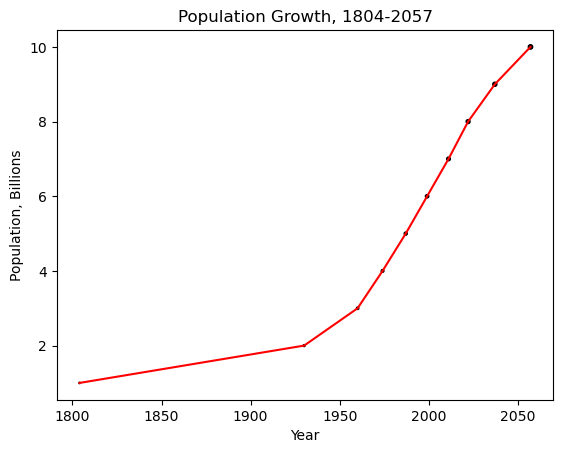

In [34]:
## Population trends, 1800-2050
## Visualise world population 
plt.plot(population1['year'], population1['population'], c = "red")

## Add points to the plot 
plt.scatter(population1['year'], population1['population'], c = "black", s= population1["population"])

plt.xlabel("Year")

plt.ylabel("Population, Billions")

plt.title("Population Growth, 1804-2057")

plt.show()

Let us examine the countries with the highest and lowest population in the data. See the other relevant details below:

In [39]:
# China has the highest population. 
final_data.loc[final_data['Population'].idxmax()]

Country_x          China
Population    1411750000
Code                 CHN
Continent           Asia
Region         East Asia
Country_y          China
Capital          Beijing
FIPS                  CH
ISO2                  CN
ISO_No             156.0
Internet              CN
Name: 0, dtype: object

In [38]:
# Niue, with a population of 1549 is the country with the lowest population.
final_data.loc[final_data['Population'].idxmin()]

Country_x        Niue
Population       1549
Code              NIU
Continent     Oceania
Region        Pacific
Country_y        Niue
Capital         Alofi
FIPS               NE
ISO2               NU
ISO_No          570.0
Internet           NU
Name: 171, dtype: object

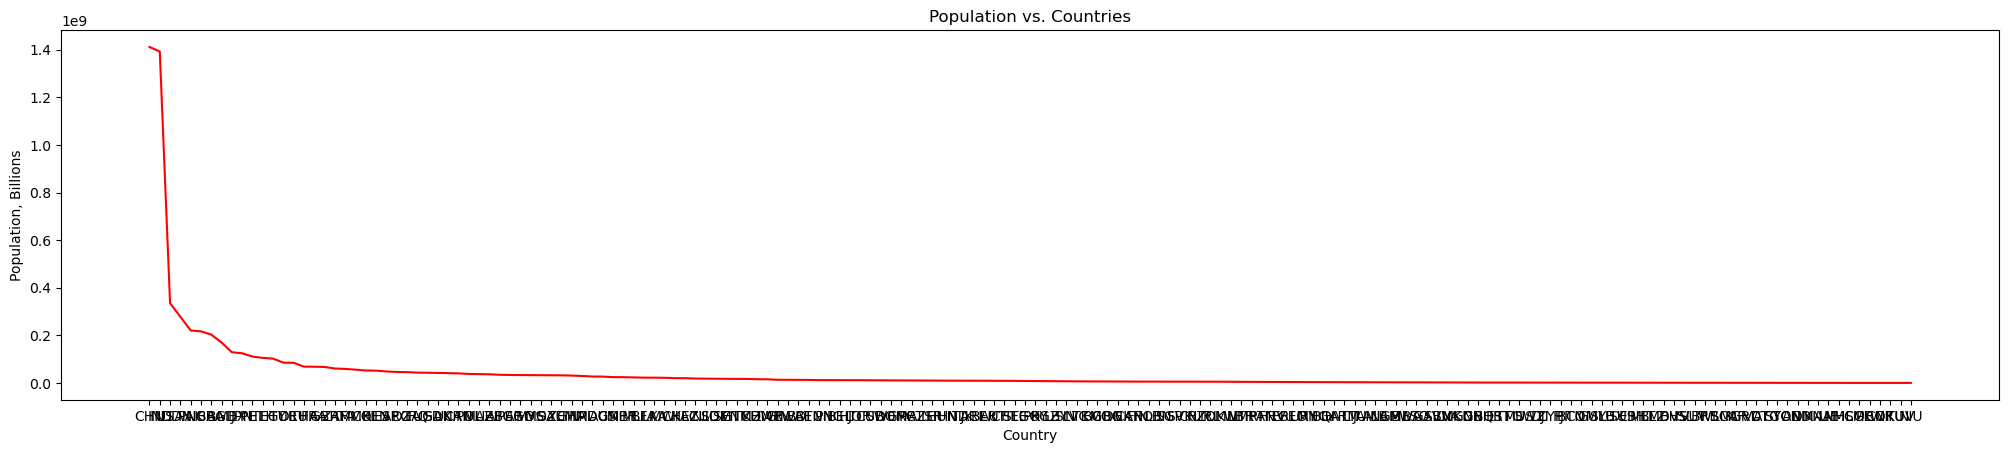

In [80]:
plt.figure().set_figwidth(25)
plt.plot(final_data['Code'], final_data['Population'], c = "red")

## Add points to the plot 
plt.scatter(final_data['Code'], final_data['Population'], c = "White", s= final_data["Population"])

plt.xlabel("Country")

plt.ylabel("Population, Billions")

plt.title("Population vs. Countries")

plt.show()

I create a summary of population by continent and sub-regions. The summary shows Oceania having the lowest population while Asia holds the bulk of global human population.

In [40]:
final_data.groupby('Continent').sum()['Population'].sort_values()

Continent
Oceania       46078434
Europe       559068980
Americas     978663360
Africa      1141019539
Asia        4314993357
Name: Population, dtype: int64

I run the same analysis for subregions. South Asia has the most people.

In [42]:
final_data.groupby('Region').sum()['Population'].sort_values()

Region
Northern Asia           3457548
Northern Europe        27918959
Indian Ocean           29043312
South East Europe      30839068
Central Europe         33048983
West Indies            38842094
Pacific                46078434
Central Africa         54642806
South West Europe      58746682
Southern Europe        59342333
Central Asia           79173971
Eastern Europe         94170607
Southern Africa       171333456
Central America       179105552
Eastern Africa        221924244
Northern Africa       245814796
Western Europe        255002348
South West Asia       260611665
North America         375329800
South America         385385914
Western Africa        418260925
South East Asia       566148018
East Asia            1536250000
South Asia           1869352155
Name: Population, dtype: int64

Next, I visualise the population by continent and subregions. I start with a plot of population by continent.

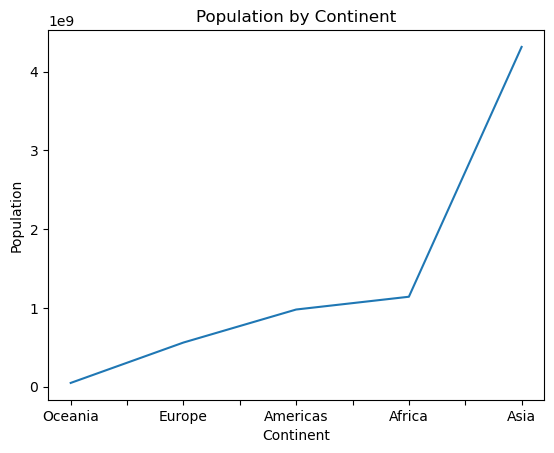

In [47]:
## Plot sorted population by continent
final_data.groupby('Continent').sum()['Population'].sort_values().plot()
plt.style.context("tableau-colorblind10")
plt.xlabel("Continent")
plt.ylabel("Population")
plt.title("Population by Continent")
plt.show()

Then I do a boxplot of population by continent.

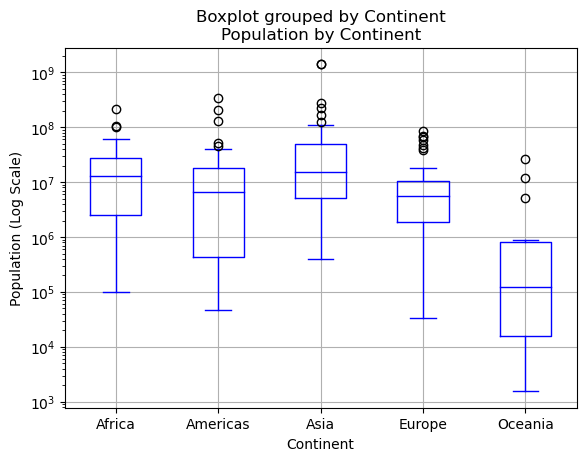

In [49]:
## Box plot of population by continent
final_data.boxplot(column="Population", by='Continent', color = 'blue')
plt.style.context("tableau-colorblind10")
plt.xlabel("Continent")
plt.ylabel("Population (Log Scale)")
plt.yscale('log')
plt.title("Population by Continent")
plt.show()

Lastly, I do a boxplot of population by regions.

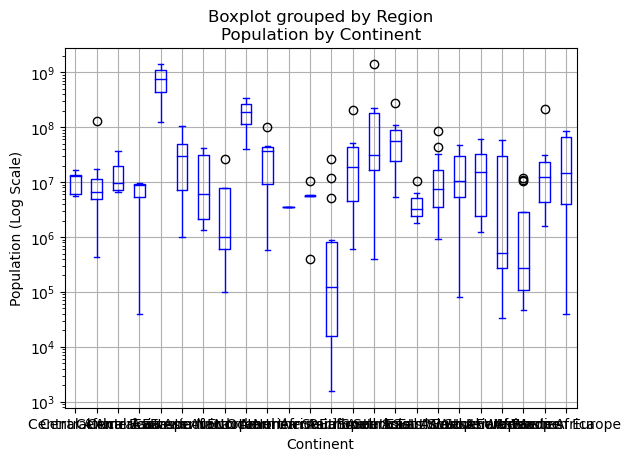

In [58]:
## Population by regions
final_data.boxplot(column="Population", by=['Region'], color = 'blue')
plt.style.context("tableau-colorblind10")
#fig = plt.figure(figsize =(10, 7))
plt.yscale('log')
plt.xlabel("Continent")
plt.ylabel("Population (Log Scale)")
plt.title("Population by Continent")
plt.show()

# 5) Conclusion

In this analysis, I illustrate how to:

The objectives of the analysis are as follows:

To illustrate how to scrap data tables from websites using Python and Pandas.

To demonstrate the mechanics of analyzing and plotting data in Python, Pandas and Matplotlib.

To illustrate how to merge data in the Python module Pandas.

To visualise the trend in global population from 1800 to 2050.

To visualise world population by continent using the pythom module matplotlib.

I hope you find this write up useful.